In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

In [38]:
df = pd.read_csv('student-math.csv')
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

## Ermittle nach Geschlechtern gruppiert den durchschnittlichen Alkoholkonsum

In [3]:
df.groupby('sex')[['Dalc', 'Walc']].mean()

Dalc      Walc
sex                    
F    1.254808  1.956731
M    1.732620  2.663102

## Ermittle jene 3 Features, welche am meisten Einfluss auf `G3` haben, abgesehen von `G1` und `G2`


In [4]:
df.corr() \
.drop(['G1', 'G2']) \
['G3'] \
.abs() \
.sort_values(ascending=False)[1:4]


failures    0.360415
Medu        0.217147
age         0.161579
Name: G3, dtype: float64

## Ermittle jene 3 Features, welche am meisten Einfluss auf `Walc` haben

In [5]:
df.corr()['Walc'].abs().sort_values(ascending=False)[1:4]

Dalc         0.647544
goout        0.420386
studytime    0.253785
Name: Walc, dtype: float64

## Ermittle die Absenzzahl jenes Schülers mit den meisten Absenzen, der trotzdem >= 10 G3 hat

In [6]:
df[df['G3'] >= 10].sort_values(by='absences', ascending=False)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
74      GP   F   16       U     GT3       T     3     3     other  services   
315     GP   F   19       R     GT3       T     2     3     other     other   
40      GP   F   16       U     LE3       T     2     2     other     other   
198     GP   F   17       U     GT3       T     4     4  services   teacher   
320     GP   F   17       U     GT3       A     4     3  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
154     GP   F   17       U     GT3       T     4     4     other   teacher   
149     GP   M   15       U     LE3       A     2     1  services     other   
145     GP   F   15       U     GT3       T     1     1     other  services   
139     GP   F   15       U     GT3       T     4     4   teacher   teacher   
393     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
74   ...      4        3      3     2     4      5       54  11  12  11  
315  ...      4        1      2     1     1      3       40  13  11  11  
40   ...      3        3      3     1     2      3       25   7  10  11  
198  ...      4        2      4     2     3      2       24  18  18  18  
320  ...      5        2      2     1     2      5       23  13  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
154  ...      4        2      1     1     1      4        0  11  11  12  
149  ...      4        5      5     2     5      5        0   8   9  10  
145  ...      4        4      2     1     2      5        0   8  11  11  
139  ...      4        3      2     1     1      5        0  16  16  15  
393  ...      4        4      1     3     4      5        0  11  12  10  

[265 rows x 33 columns]

## Ermittle, ob die Schüler mit mehr als 18 Punkten eher aus dem ruralen oder aus dem urbanen Raum kommen

In [7]:
df[df['G3']>18]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
8       GP   M   15       U     LE3       A     3     2  services     other   
47      GP   M   16       U     GT3       T     4     3    health  services   
110     GP   M   15       U     LE3       A     4     4   teacher   teacher   
113     GP   M   15       U     LE3       T     4     2   teacher     other   
286     GP   F   18       U     GT3       T     2     2   at_home   at_home   
374     MS   F   18       R     LE3       T     4     4     other     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
8    ...      4        2      2     1     1      1        0  16  18  19  
47   ...      4        2      2     1     1      2        4  19  19  20  
110  ...      5        5      3     1     1      4        6  18  19  19  
113  ...      3        5      2     1     1      3       10  18  19  19  
286  ...      4        3      3     1     2      2        5  18  18  19  
374  ...      5        4      4     1     1      1        0  19  18  19  

[6 rows x 33 columns]

In [8]:
sns.countplot(data=df, x='G3', hue='Pstatus')

<AxesSubplot:xlabel='G3', ylabel='count'>

## Versuche, folgende Behauptung zu widerlegen:
"Dass die Eltern unter einem Dach leben ist sehr wichtig für eine herausragende Mathematiknote, immerhin leben doppelt so viele dieser Schüler mit **beiden** Eltern zusammen"

In [9]:
df.groupby('Pstatus').size()

Pstatus
A     41
T    354
dtype: int64

In [10]:
4/6

0.6666666666666666

In [11]:
354/(307+88)

0.8962025316455696

<AxesSubplot:xlabel='G3', ylabel='Count'>

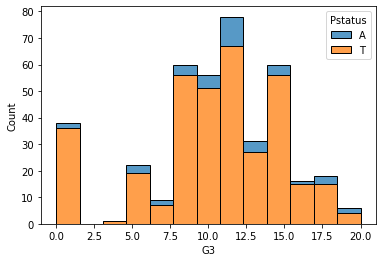

In [12]:
sns.histplot(data=df, x='G3', hue='Pstatus', multiple="stack")

## Erzeuge folgende Graphik, welche die Punkte nach Adresse darstellt
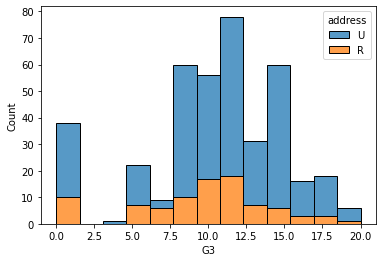

<AxesSubplot:xlabel='G3', ylabel='Count'>

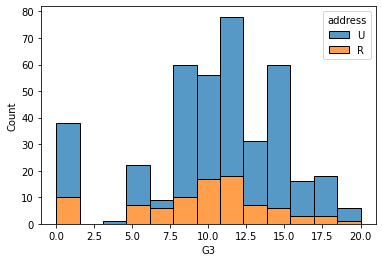

In [13]:
sns.histplot(data=df, x='G3', hue='address', multiple="stack")

## Ermittle die durchschnittliche Punktzahl aller Schüler, bei denen Mutter und Vater derselben Berufsgruppe angehören, gruppiert nach Berufsgruppe

In [14]:
df[df['Mjob'] == df['Fjob']].groupby('Mjob')['G3'].mean()

Mjob
at_home     12.285714
health      13.500000
other        9.798077
services    10.767442
teacher     13.083333
Name: G3, dtype: float64

## Ersetze fehlende Werte durch den **Median** der jeweiligen `address`

In [15]:
df['traveltime'] = df.groupby('address')['traveltime'].apply(lambda category: category.fillna(category.median()))